### Угадываем признак

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


Посмотрим много ли в наших признаках пустых значений

In [4]:
data[ pd.isnull( data['height'] ) ].head()


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [12]:
data.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [13]:
data = data[['nationality', 'sex', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']]

In [16]:
data  =data[~pd.isnull( data['height'] ) ]

In [17]:
data  =data[~pd.isnull( data['weight'] ) ]

In [19]:
print ('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print ('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print ('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print ('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 0
Для weight пустых строк 0
Для sport пустых строк 0
Всего строк в наборе 10858


In [9]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
id             10858 non-null int64
name           10858 non-null object
nationality    10858 non-null object
sex            10858 non-null object
dob            10858 non-null object
height         10858 non-null float64
weight         10858 non-null float64
sport          10858 non-null object
gold           10858 non-null int64
silver         10858 non-null int64
bronze         10858 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Готовим данные

In [21]:
data.columns

Index(['nationality', 'sex', 'height', 'weight', 'sport', 'gold', 'silver',
       'bronze'],
      dtype='object')

In [22]:
X, y = data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']], data['sex']

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
X = pd.get_dummies(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Строим модель

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
le = LogisticRegression()
le.fit(X_train, y_train)
le.score(X_test, y_test)

/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8311847759361571

# Оценить качество

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

In [33]:
probas = le.predict_proba(X_test)[:,1]

In [35]:
precision, recall, thresholds = precision_recall_curve(y_test, probas)
fpr, tpr, thresholds2 = roc_curve(y_test, probas)

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

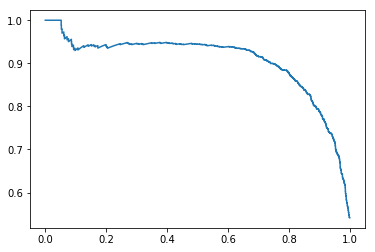

In [39]:
plt.plot(recall, precision)
plt.show()

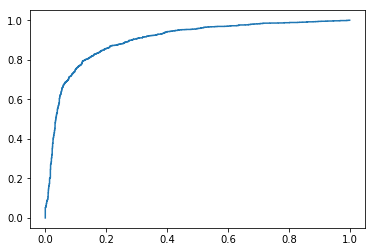

In [38]:
plt.plot(fpr, tpr)
plt.show()

In [41]:
roc_auc_score(y_test, probas)

0.9007267583021239

In [43]:
average_precision_score(y_test, probas)

0.9055378460486743